In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify as mc
from shapely.geometry import Point, Polygon
import seaborn as sns

In [2]:
costco = pd.read_csv('costcos-geocoded.csv')

In [3]:
costco

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217
...,...,...,...,...,...,...
412,19610 SE 1st St,Vancouver,Washington,98607,45.621299,-122.459135
413,10990 Harbor Hill Dr,Gig Harbor,Washington,98335,47.357748,-122.603888
414,27520 Covington Way SE,Covington,Washington,98042,47.354838,-122.121185
415,2150 Deming Way,Middleton,Wisconsin,53562-5507,43.100195,-89.522751


In [4]:
geometry = [Point(xy) for xy in zip(costco["Latitude"],costco["Longitude"])]
geometry[:3]

In [5]:
map_nation = gpd.read_file('cb_2018_us_state_20m.shp')

In [6]:
crs = {'init':'epsg:4326'}

In [7]:
geo_costco = gpd.GeoDataFrame(costco, crs=crs,geometry = geometry)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
geo_costco

,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (34.743 -86.601)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (33.378 -86.812)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (32.364 -86.151)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (58.359 -134.483)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (61.143 -149.884)
...,...,...,...,...,...,...,...
412,19610 SE 1st St,Vancouver,Washington,98607,45.621299,-122.459135,POINT (45.621 -122.459)
413,10990 Harbor Hill Dr,Gig Harbor,Washington,98335,47.357748,-122.603888,POINT (47.358 -122.604)
414,27520 Covington Way SE,Covington,Washington,98042,47.354838,-122.121185,POINT (47.355 -122.121)
415,2150 Deming Way,Middleton,Wisconsin,53562-5507,43.100195,-89.522751,POINT (43.100 -89.523)


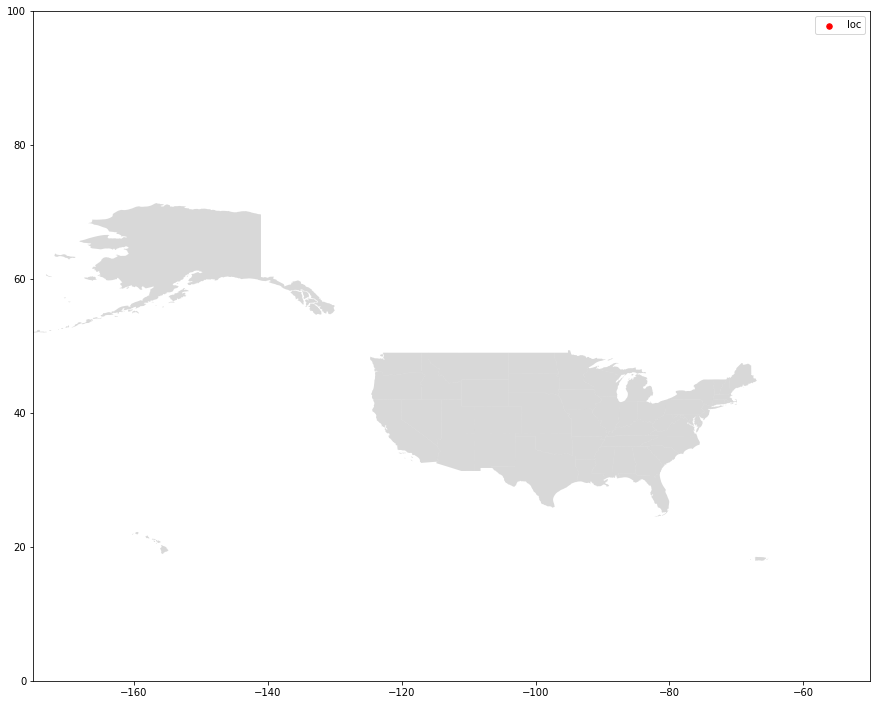

In [9]:
fig,ax = plt.subplots(figsize = (15,15))
ax.set_xlim(-175,-50)
ax.set_ylim(0,100)
map_nation.plot(ax = ax,alpha=0.3,color='grey', zorder=1)
geo_costco.plot(ax = ax, markersize=30, color="red",marker = 'o',aspect=1, zorder=2, label="loc")
plt.legend()

In [10]:
ppg = pd.read_csv('./ppg2008.csv', index_col=0)

In [11]:
ppg

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,1.3,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,2.3,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,0.0,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,0.8,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7


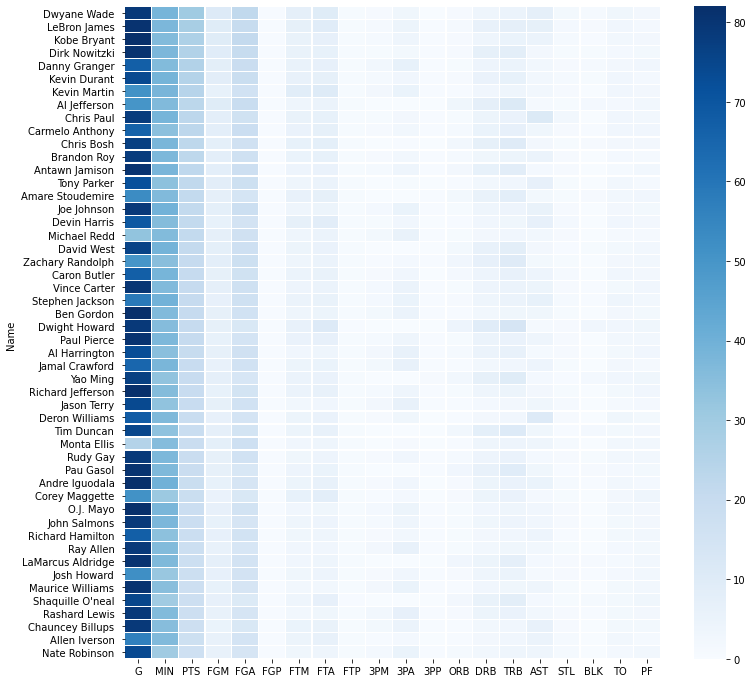

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

hm = sns.heatmap(ppg, linewidths=.2, cmap="Blues")

In [13]:
bball = pd.read_csv('./ppg2008.csv', index_col=0)

In [14]:
bball.head(10)

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,1.3,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,2.3,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,0.0,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,0.8,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7


In [15]:
bball['CHUCKER'] = pd.cut(bball['3PA'],
                              bins=[-1, 1.75, 3.2, 5.075, 7],
                              labels=['NOT REALLY','MAYBE','KIND OF', 'CHUCK-EM'])

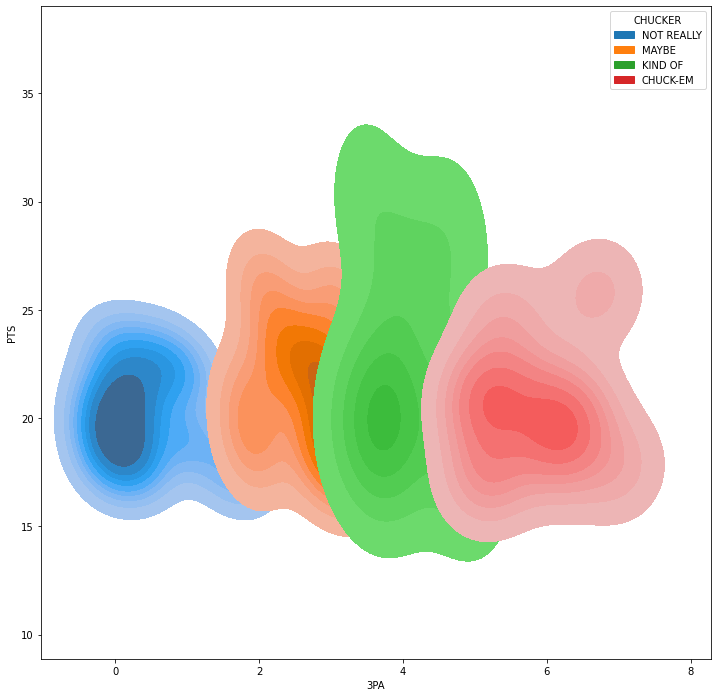

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

sns.kdeplot(x="3PA",y="PTS",data=bball, hue="CHUCKER", fill=True)